An observational technique to determine the amount of freshwater in a region is to compare a reference "open ocean" salinity to the average salinity, and calculate how much freshwater would need to be added to that region to achieve the resultant average salinity. This process can be flipped to compare with the results I am getting for freshwater content, i.e. using the average salinity and amount of freshwater to calculate a reference salinity of the "open ocean" or ocean water entering the region.

$F_w = \int{\frac{(S_{ref} - S_A)}{S_{ref}} dz}$

$m_{fw} = H - \frac{1}{S_{ref}} \int_0^H{S_A}dz$

I am not sure how to deal with depth here, but I'm thinking that H doesn't necessarily need to be the full depth? As long as it's adequately below the halocline to capture the saltiest water, I don't think it needs to go all the way down?

A good reference to have in mind for this part is this: https://journals.ametsoc.org/view/journals/phoc/49/9/jpo-d-19-0102.1.xml
Argues that freshwater content is not useful in physical oceanography because of ambiguous reference salinity; I can counter-argue and say that using a model to get a real value for this is maybe a better use of this metric. Also, there are some good references in the introduction of this paper that I should bring into my introduction.

In [30]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
from salishsea_tools import viz_tools
import matplotlib as mpl

In [3]:
def plot_box(ax, corn, colour):
    ax.plot([corn[2], corn[3], corn[3], corn[2], corn[2]], 
            [corn[0], corn[0], corn[1], corn[1], corn[0]], '-', color=colour)

In [4]:
def make_profile_ts(ds, reg_list):
    all_ts = ds.isel(gridY=slice(reg_list[0][0], reg_list[0][1]), gridX=slice(reg_list[0][2], reg_list[0][3])).mean(dim='gridY', skipna=True).mean(dim='gridX', skipna=True)
    for region in reg_list[1:]:
        next = ds.isel(gridY=slice(region[0], region[1]), gridX=slice(region[2], region[3])).mean(dim='gridY', skipna=True).mean(dim='gridX', skipna=True)
        all_ts = (all_ts + next) / 2
        # print(region)

    return all_ts

In [5]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')

mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]
area = ((1-tmask) * mesh.e1t[0] * mesh.e2t[0]).rename({'z':'depth', 'y':'gridY', 'x':'gridX'})[0]
volume = ((1-tmask) * mesh.e3t_0[0] * mesh.e1t[0] * mesh.e2t[0]).rename({'z':'depth', 'y':'gridY', 'x':'gridX'})
tmask = tmask.rename({'z':'depth', 'y':'gridY', 'x':'gridX'})
mmask = 1 - tmask
delta_d = mesh.e3t_0[0].rename({'z':'depth', 'y':'gridY', 'x':'gridX'})

In [6]:
# fwsum_2023_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2023, 2023))
# fwsum_2022_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2022, 2022))
# fwsum_2021_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2021, 2021))
# fwsum_2020_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2020, 2020))
# fwsum_2019_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2019, 2019))

In [7]:
fw_2023_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2023, 2023))
fw_2022_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2022, 2022))
fw_2021_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2021, 2021))
fw_2020_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2020, 2020))
fw_2019_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2019, 2019))

In [8]:
phys_2023_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2023, 2023))
phys_2022_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2022, 2022))
phys_2021_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2021, 2021))
phys_2020_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2020, 2020))
phys_2019_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2019, 2019))

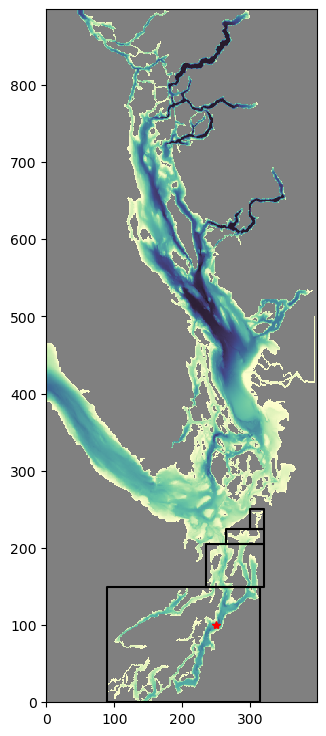

In [9]:
## my boxes
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
mycmap = cm.deep
mycmap.set_bad('grey')
ax.pcolormesh(bathy['Bathymetry'], cmap=mycmap)
viz_tools.set_aspect(ax);
PS_main = [0, 150, 90, 315]
plot_box(ax, PS_main, 'k')
PS_AIWB = [150, 205, 235, 320]
plot_box(ax, PS_AIWB, 'k')
PS_WB = [205, 225, 265, 320]
plot_box(ax, PS_WB, 'k')
PS_DP = [225, 250, 300, 320]
plot_box(ax, PS_DP, 'k')

PS_all = [PS_main, PS_AIWB, PS_WB, PS_DP]

ax.plot(250, 100, 'r*')

## Hypsographic Avg Method

In [10]:
def calc_sref(A, H, Fw):
    return A / (H - Fw)

## Single Point Method

try this now with just one point and see what happens. Even if this is wrong, can still be an interesting thing to explore!

In [65]:
flattened = np.nan_to_num(bathy['Bathymetry'].sel(x=slice(100,300), y=slice(0,250)).to_numpy())
max_indecies = np.unravel_index(flattened.argmax(), flattened.shape)
max_indecies

(103, 153)

In [70]:
bathy['Bathymetry'].sel(x=250, y=100)

<xarray.DataArray 'Bathymetry' ()>
array(253.3125)
Attributes:
    units:      metres
    long_name:  sea_floor_depth

In [71]:
bathy['Bathymetry'].sel(x=235, y=80)

<xarray.DataArray 'Bathymetry' ()>
array(196.25)
Attributes:
    units:      metres
    long_name:  sea_floor_depth

In [77]:
mesh.isel(z=0, t=0)

<xarray.Dataset>
Dimensions:       (y: 898, x: 398)
Dimensions without coordinates: y, x
Data variables: (12/43)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    time_counter  datetime64[ns] ...
    tmask         (y, x) int8 ...
    umask         (y, x) int8 ...
    vmask         (y, x) int8 ...
    ...            ...
    gdepv         (y, x) float32 ...
    gdepw_0       (y, x) float32 ...
    gdept_1d      float64 ...
    gdepw_1d      float64 ...
    e3t_1d        float64 ...
    e3w_1d        float64 ...
Attributes:
    file_name:    grid/mesh_mask202108.nc
    TimeStamp:    07/08/2021 17:25:49 -0700
    Conventions:  CF-1.6
    title:        SalishSeaCast NEMO bathymetry_202108 Bathymetry Mesh Mask
    institution:  Dept of Earth, Ocean & Atmospheric Sciences, University of ...
    source:       NEMO-3.6 SalishSeaCast configuration
    references:   https://github.com/SalishSeaCast/tools/blob/main/bathymetry...
    history:      [2021-08-07 17:25] ncks -4 -L4 -O mesh_mask.nc mesh_mask202...

/tmp/ipykernel_2654715/3373522693.py:11: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(lon_x, lat_y, bathy['Bathymetry'], cmap=mycmap)


(47.20204544067383, 48.09181594848633)

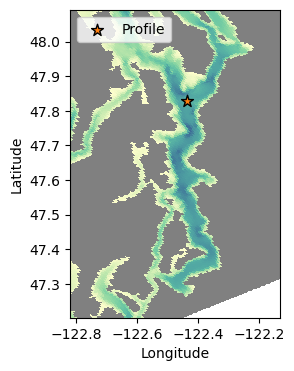

In [198]:
# [y, x]
point1 = [120, 262]
point2 = [100, 250]

lon_x = mesh.isel(z=0, t=0).nav_lon
lat_y = mesh.isel(z=0, t=0).nav_lat

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
mycmap = cm.deep
mycmap.set_bad('grey')
ax.pcolormesh(lon_x, lat_y, bathy['Bathymetry'], cmap=mycmap)
viz_tools.set_aspect(ax);

ax.scatter(lon_x.isel(x=point1[1], y=point1[0]), lat_y.isel(x=point1[1], y=point1[0]), s=80, marker='*', color='tab:orange', label='Profile', edgecolor='k')
# ax.scatter(lon_x.isel(x=point2[1], y=point2[0]), lat_y.isel(x=point2[1], y=point2[0]), s=80, marker='*', color='tab:red', label='Seattle', edgecolor='k')
# ax.scatter(point2[1], point2[0], s=80, marker='*', color='tab:orange', label='Deep', edgecolor='k')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

ax.legend(loc='upper left')

xlim_min = 130
xlim_max = 260
ylim_min = 25
ylim_max = 250
ax.set_xlim([lon_x.isel(x=xlim_min, y=ylim_min), lon_x.isel(x=xlim_max, y=ylim_min)])
ax.set_ylim([lat_y.isel(y=ylim_min, x=xlim_min), lat_y.isel(y=ylim_max, x=xlim_min)])
# ax.set_xlim([150,300])
# ax.set_ylim([0,200])

## Seattle

In [13]:
point_prof_2023 = phys_2023_mon.sel(gridY=point2[0], gridX=point2[1])
point_prof_2022 = phys_2022_mon.sel(gridY=point2[0], gridX=point2[1])
point_prof_2021 = phys_2021_mon.sel(gridY=point2[0], gridX=point2[1])
point_prof_2020 = phys_2020_mon.sel(gridY=point2[0], gridX=point2[1])
point_prof_2019 = phys_2019_mon.sel(gridY=point2[0], gridX=point2[1])

depth_prof_mask = (point_prof_2023 != 0).votemper

point_prof_all = xr.concat([point_prof_2019, point_prof_2020, point_prof_2021, point_prof_2022, point_prof_2023], dim='time').where(depth_prof_mask[0])

In [14]:
point_riv_2023 = fw_2023_mon.sel(gridY=point2[0], gridX=point2[1])
point_riv_2022 = fw_2022_mon.sel(gridY=point2[0], gridX=point2[1])
point_riv_2021 = fw_2021_mon.sel(gridY=point2[0], gridX=point2[1])
point_riv_2020 = fw_2020_mon.sel(gridY=point2[0], gridX=point2[1])
point_riv_2019 = fw_2019_mon.sel(gridY=point2[0], gridX=point2[1])

point_riv_all0 = xr.concat([point_riv_2019, point_riv_2020, point_riv_2021, point_riv_2022, point_riv_2023], dim='time').where(depth_prof_mask[0])

vol_prof = volume.sel(gridY=point2[0], gridX=point2[1])
point_riv_all = point_riv_all0 / vol_prof

In [15]:
# fig, ax = plt.subplots(2, 1, figsize=(8.5, 6), sharex=True)
# colormesh1 = ax[0].pcolormesh(point_prof_all['time'], point_prof_all['depth'], point_prof_all['vosaline'].T, cmap=cm.haline)
# ax[0].set_ylim([267, -1])
# cb1 = fig.colorbar(colormesh1, ax=ax[0], label='Salinity [g/kg]')
# # ax[0].set_title('Puget Sound Single Point Salinity')
# ax[0].set_ylabel('Depth [m]')

# colormesh2 = ax[1].pcolormesh(point_prof_all['time'], point_prof_all['depth'], point_prof_all['votemper'].T, cmap=cm.thermal)
# ax[1].set_ylim([267, -1])
# cb2 = fig.colorbar(colormesh2, ax=ax[1], label='Temperature [degC]')
# ax[1].tick_params(axis='x', labelrotation=45)
# # ax[1].set_title('Puget Sound Single Point Temperature')
# ax[1].set_ylabel('Depth [m]')

In [16]:
# fig, ax = plt.subplots(2, 1, figsize=(8.5, 6), sharex=True)
# colormesh1 = ax[0].contourf(point_prof_all['time'], point_prof_all['depth'], point_prof_all['vosaline'].T, cmap=cm.haline)
# ax[0].set_ylim([254, 0])
# cb1 = fig.colorbar(colormesh1, ax=ax[0], label='Salinity [g/kg]')
# ax[0].set_ylabel('Depth [m]')

# colormesh2 = ax[1].contourf(point_prof_all['time'], point_prof_all['depth'], point_prof_all['votemper'].T, cmap=cm.thermal)
# ax[1].set_ylim([254, 0])
# cb2 = fig.colorbar(colormesh2, ax=ax[1], label='Temperature [degC]')
# ax[1].tick_params(axis='x', labelrotation=45)
# ax[1].set_ylabel('Depth [m]')

In [17]:
sig_rivers = list(['Fraser', 'Snohomish', 'Nisqually', 'Skagit', 'Squamish', 'Homathko'])

Text(0, 0.5, 'Depth [m]')

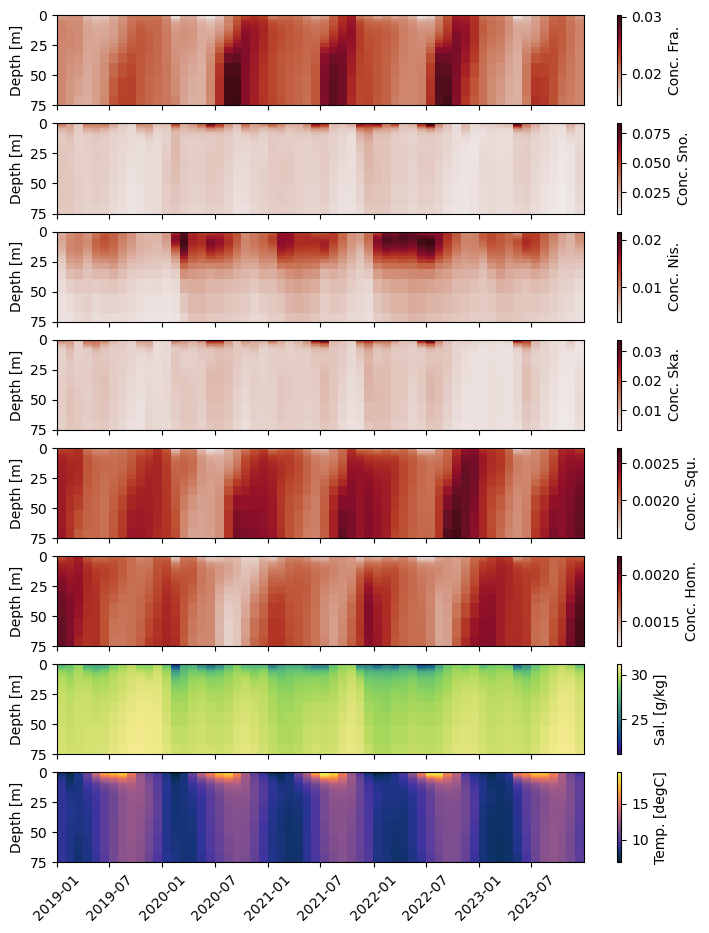

In [34]:
fig, ax = plt.subplots(8, 1, figsize=(8.5, 11), sharex=True)
# mycmap = mpl.colormaps['viridis']
mycmap = cm.amp

colormesh1 = ax[0].pcolormesh(point_riv_all['time'], point_riv_all['depth'], point_riv_all['fraser_river'].T, cmap=mycmap)
ax[0].set_ylim([75, 0])
cb1 = fig.colorbar(colormesh1, ax=ax[0], label='Conc. Fra.')
ax[0].set_ylabel('Depth [m]')

colormesh2 = ax[1].pcolormesh(point_riv_all['time'], point_riv_all['depth'], point_riv_all['snohomish_river'].T, cmap=mycmap)
ax[1].set_ylim([75, 0])
cb2 = fig.colorbar(colormesh2, ax=ax[1], label='Conc. Sno.')
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_ylabel('Depth [m]')

colormesh2 = ax[2].pcolormesh(point_riv_all['time'], point_riv_all['depth'], point_riv_all['nisqually_river'].T, cmap=mycmap)
ax[2].set_ylim([75, 0])
cb2 = fig.colorbar(colormesh2, ax=ax[2], label='Conc. Nis.')
ax[2].tick_params(axis='x', labelrotation=45)
ax[2].set_ylabel('Depth [m]')

colormesh2 = ax[3].pcolormesh(point_riv_all['time'], point_riv_all['depth'], point_riv_all['skagit_river'].T, cmap=mycmap)
ax[3].set_ylim([75, 0])
cb2 = fig.colorbar(colormesh2, ax=ax[3], label='Conc. Ska.')
ax[3].tick_params(axis='x', labelrotation=45)
ax[3].set_ylabel('Depth [m]')

colormesh2 = ax[4].pcolormesh(point_riv_all['time'], point_riv_all['depth'], point_riv_all['squamish_river'].T, cmap=mycmap)
ax[4].set_ylim([75, 0])
cb2 = fig.colorbar(colormesh2, ax=ax[4], label='Conc. Squ.')
ax[4].tick_params(axis='x', labelrotation=45)
ax[4].set_ylabel('Depth [m]')

colormesh2 = ax[5].pcolormesh(point_riv_all['time'], point_riv_all['depth'], point_riv_all['homathko_river'].T, cmap=mycmap)
ax[5].set_ylim([75, 0])
cb2 = fig.colorbar(colormesh2, ax=ax[5], label='Conc. Hom.')
ax[5].tick_params(axis='x', labelrotation=45)
ax[5].set_ylabel('Depth [m]')

colormesh1 = ax[6].pcolormesh(point_prof_all['time'], point_prof_all['depth'], point_prof_all['vosaline'].T, cmap=cm.haline)
ax[6].set_ylim([75, 0])
cb1 = fig.colorbar(colormesh1, ax=ax[6], label='Sal. [g/kg]')
ax[6].set_ylabel('Depth [m]')

colormesh2 = ax[7].pcolormesh(point_prof_all['time'], point_prof_all['depth'], point_prof_all['votemper'].T, cmap=cm.thermal)
ax[7].set_ylim([75, 0])
cb2 = fig.colorbar(colormesh2, ax=ax[7], label='Temp. [degC]')
ax[7].tick_params(axis='x', labelrotation=45)
ax[7].set_ylabel('Depth [m]')

## Whidbey

In [199]:
point_prof_2023 = phys_2023_mon.sel(gridY=point1[0], gridX=point1[1])
point_prof_2022 = phys_2022_mon.sel(gridY=point1[0], gridX=point1[1])
point_prof_2021 = phys_2021_mon.sel(gridY=point1[0], gridX=point1[1])
point_prof_2020 = phys_2020_mon.sel(gridY=point1[0], gridX=point1[1])
point_prof_2019 = phys_2019_mon.sel(gridY=point1[0], gridX=point1[1])

depth_prof_mask = (point_prof_2023 != 0).votemper

point_prof_all = xr.concat([point_prof_2019, point_prof_2020, point_prof_2021, point_prof_2022, point_prof_2023], dim='time').where(depth_prof_mask[0])
point_riv_2023 = fw_2023_mon.sel(gridY=point1[0], gridX=point1[1])
point_riv_2022 = fw_2022_mon.sel(gridY=point1[0], gridX=point1[1])
point_riv_2021 = fw_2021_mon.sel(gridY=point1[0], gridX=point1[1])
point_riv_2020 = fw_2020_mon.sel(gridY=point1[0], gridX=point1[1])
point_riv_2019 = fw_2019_mon.sel(gridY=point1[0], gridX=point1[1])

point_riv_all0 = xr.concat([point_riv_2019, point_riv_2020, point_riv_2021, point_riv_2022, point_riv_2023], dim='time').where(depth_prof_mask[0])

vol_prof = volume.sel(gridY=point1[0], gridX=point1[1])
point_riv_all = point_riv_all0 / vol_prof
 
sig_rivers = list(['Fraser', 'Snohomish', 'Nisqually', 'Skagit', 'Squamish', 'Homathko'])

<a list of 10 text.Text objects>

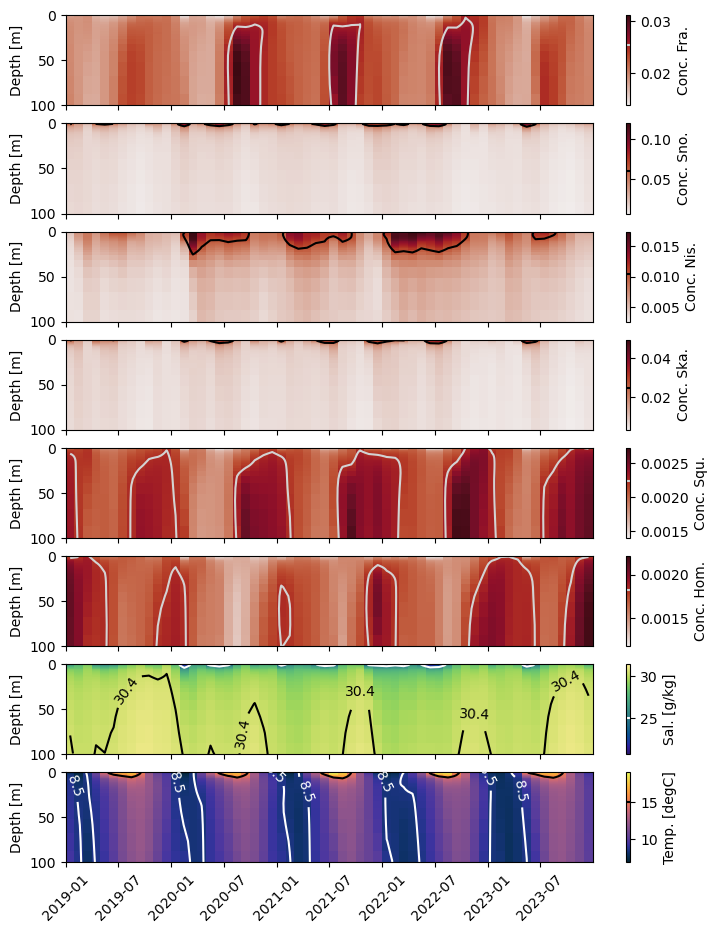

In [200]:
fig, ax = plt.subplots(8, 1, figsize=(8.5, 11), sharex=True)
mycmap = cm.amp

colormesh1 = ax[0].pcolormesh(point_riv_all['time'], point_riv_all['depth'], point_riv_all['fraser_river'].T, cmap=mycmap)
ax[0].set_ylim([100, 0])
cb1 = fig.colorbar(colormesh1, ax=ax[0], label='Conc. Fra.')
ax[0].set_ylabel('Depth [m]')
fras_max = point_riv_all['fraser_river'].max().values
fras_cont = [fras_max*.82]
cont1 = ax[0].contour(point_riv_all['time'], point_riv_all['depth'], point_riv_all['fraser_river'].T, fras_cont, colors='lightgrey')
cb1.add_lines(cont1)
# ax[0].clabel(cont1, cont1.levels, fontsize=10)

colormesh2 = ax[1].pcolormesh(point_riv_all['time'], point_riv_all['depth'], point_riv_all['snohomish_river'].T, cmap=mycmap)
ax[1].set_ylim([100, 0])
cb2 = fig.colorbar(colormesh2, ax=ax[1], label='Conc. Sno.')
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_ylabel('Depth [m]')
sno_max = point_riv_all['snohomish_river'].max().values
sno_cont = [sno_max*.5]
cont2 = ax[1].contour(point_riv_all['time'], point_riv_all['depth'], point_riv_all['snohomish_river'].T, sno_cont, colors='black')
cb2.add_lines(cont2)

colormesh2 = ax[2].pcolormesh(point_riv_all['time'], point_riv_all['depth'], point_riv_all['nisqually_river'].T, cmap=mycmap)
ax[2].set_ylim([100, 0])
cb2 = fig.colorbar(colormesh2, ax=ax[2], label='Conc. Nis.')
ax[2].tick_params(axis='x', labelrotation=45)
ax[2].set_ylabel('Depth [m]')
nis_max = point_riv_all['nisqually_river'].max().values
nis_cont = [nis_max*.6]
cont3 = ax[2].contour(point_riv_all['time'], point_riv_all['depth'], point_riv_all['nisqually_river'].T, nis_cont, colors='black')
cb2.add_lines(cont3)

colormesh2 = ax[3].pcolormesh(point_riv_all['time'], point_riv_all['depth'], point_riv_all['skagit_river'].T, cmap=mycmap)
ax[3].set_ylim([100, 0])
cb2 = fig.colorbar(colormesh2, ax=ax[3], label='Conc. Ska.')
ax[3].tick_params(axis='x', labelrotation=45)
ax[3].set_ylabel('Depth [m]')
ska_max = point_riv_all['skagit_river'].max().values
ska_cont = [ska_max*.5]
cont3 = ax[3].contour(point_riv_all['time'], point_riv_all['depth'], point_riv_all['skagit_river'].T, ska_cont, colors='black')
cb2.add_lines(cont3)

colormesh2 = ax[4].pcolormesh(point_riv_all['time'], point_riv_all['depth'], point_riv_all['squamish_river'].T, cmap=mycmap)
ax[4].set_ylim([100, 0])
cb2 = fig.colorbar(colormesh2, ax=ax[4], label='Conc. Squ.')
ax[4].tick_params(axis='x', labelrotation=45)
ax[4].set_ylabel('Depth [m]')
squ_max = point_riv_all['squamish_river'].max().values
squ_cont = [squ_max*.82]
cont3 = ax[4].contour(point_riv_all['time'], point_riv_all['depth'], point_riv_all['squamish_river'].T, squ_cont, colors='lightgrey')
cb2.add_lines(cont3)

colormesh2 = ax[5].pcolormesh(point_riv_all['time'], point_riv_all['depth'], point_riv_all['homathko_river'].T, cmap=mycmap)
ax[5].set_ylim([100, 0])
cb2 = fig.colorbar(colormesh2, ax=ax[5], label='Conc. Hom.')
ax[5].tick_params(axis='x', labelrotation=45)
ax[5].set_ylabel('Depth [m]')
hom_max = point_riv_all['homathko_river'].max().values
hom_cont = [hom_max*.82]
cont3 = ax[5].contour(point_riv_all['time'], point_riv_all['depth'], point_riv_all['homathko_river'].T, hom_cont, colors='lightgrey')
cb2.add_lines(cont3)

colormesh1 = ax[6].pcolormesh(point_prof_all['time'], point_prof_all['depth'], point_prof_all['vosaline'].T, cmap=cm.haline, vmax=31.5)
ax[6].set_ylim([100, 0])
cb1 = fig.colorbar(colormesh1, ax=ax[6], label='Sal. [g/kg]')
ax[6].set_ylabel('Depth [m]')
sal_max = point_prof_all['vosaline'].max().values
sal_cont = [30.4]
cont3 = ax[6].contour(point_prof_all['time'], point_prof_all['depth'], point_prof_all['vosaline'].T, sal_cont, colors='black')
ax[6].clabel(cont3, cont3.levels, fontsize=10)
sal_min = point_prof_all['vosaline'].max().values
sal_cont = [sal_min*0.8]
cont4 = ax[6].contour(point_prof_all['time'], point_prof_all['depth'], point_prof_all['vosaline'].T, sal_cont, colors='white')
cb1.add_lines(cont4)

colormesh2 = ax[7].pcolormesh(point_prof_all['time'], point_prof_all['depth'], point_prof_all['votemper'].T, cmap=cm.thermal)
ax[7].set_ylim([100, 0])
cb2 = fig.colorbar(colormesh2, ax=ax[7], label='Temp. [degC]')
ax[7].tick_params(axis='x', labelrotation=45)
ax[7].set_ylabel('Depth [m]')
temp_max = point_prof_all['votemper'].max().values
temp_cont = [15]
cont3 = ax[7].contour(point_prof_all['time'], point_prof_all['depth'], point_prof_all['votemper'].T, temp_cont, colors='black')
cb2.add_lines(cont3)
temp_min = point_prof_all['votemper'].max().values
temp_cont = [8.5]
cont4 = ax[7].contour(point_prof_all['time'], point_prof_all['depth'], point_prof_all['votemper'].T, temp_cont, colors='white')
ax[7].clabel(cont4, cont4.levels, fontsize=10)

## Mouth

In [201]:
# point_prof1_2023 = phys_2023_mon.sel(gridY=point1[0], gridX=point1[0])
# point_prof1_2022 = phys_2022_mon.sel(gridY=point1[0], gridX=point1[0])
# point_prof1_2021 = phys_2021_mon.sel(gridY=point1[0], gridX=point1[0])
# point_prof1_2020 = phys_2020_mon.sel(gridY=point1[0], gridX=point1[0])
# point_prof1_2019 = phys_2019_mon.sel(gridY=point1[0], gridX=point1[0])

# depth_prof_mask1 = (point_prof1_2023 != 0).votemper

# point_prof1_all = xr.concat([point_prof1_2019, point_prof1_2020, point_prof1_2021, point_prof1_2022, point_prof1_2023], dim='time').where(depth_prof_mask[0])

In [202]:
# point_riv1_2023 = fw_2023_mon.sel(gridY=point2[0], gridX=point2[1])
# point_riv1_2022 = fw_2022_mon.sel(gridY=point2[0], gridX=point2[1])
# point_riv1_2021 = fw_2021_mon.sel(gridY=point2[0], gridX=point2[1])
# point_riv1_2020 = fw_2020_mon.sel(gridY=point2[0], gridX=point2[1])
# point_riv1_2019 = fw_2019_mon.sel(gridY=point2[0], gridX=point2[1])

# point_riv1_all0 = xr.concat([point_riv1_2019, point_riv1_2020, point_riv1_2021, point_riv1_2022, point_riv1_2023], dim='time').where(depth_prof_mask1[0])

# vol_prof = volume.sel(gridY=point2[0], gridX=point2[1])
# point_riv1_all = point_riv1_all0 / vol_prof

In [203]:
# fig, ax = plt.subplots(2, 1, figsize=(8.5, 6), sharex=True)
# colormesh1 = ax[0].contourf(point_prof1_all['time'], point_prof1_all['depth'], point_prof1_all['vosaline'].T, cmap=cm.haline)
# ax[0].set_ylim([25, 0])
# cb1 = fig.colorbar(colormesh1, ax=ax[0], label='Salinity [g/kg]')
# ax[0].set_ylabel('Depth [m]')

# colormesh2 = ax[1].contourf(point_prof1_all['time'], point_prof1_all['depth'], point_prof1_all['votemper'].T, cmap=cm.thermal)
# ax[1].set_ylim([25, 0])
# cb2 = fig.colorbar(colormesh2, ax=ax[1], label='Temperature [degC]')
# ax[1].tick_params(axis='x', labelrotation=45)
# ax[1].set_ylabel('Depth [m]')

In [204]:
# fig, ax = plt.subplots(2, 1, figsize=(8.5, 6), sharex=True)
# colormesh1 = ax[0].pcolormesh(point_prof1_all['time'], point_prof1_all['depth'], point_prof1_all['vosaline'].T, cmap=cm.haline)
# ax[0].set_ylim([26, 0])
# cb1 = fig.colorbar(colormesh1, ax=ax[0], label='Salinity [g/kg]')
# ax[0].set_ylabel('Depth [m]')

# colormesh2 = ax[1].pcolormesh(point_prof1_all['time'], point_prof1_all['depth'], point_prof1_all['votemper'].T, cmap=cm.thermal)
# ax[1].set_ylim([26, 0])
# cb2 = fig.colorbar(colormesh2, ax=ax[1], label='Temperature [degC]')
# ax[1].tick_params(axis='x', labelrotation=45)
# ax[1].set_ylabel('Depth [m]')

## stuff

In [205]:
# salinity = point_prof_all['vosaline']
# depth_bool = salinity >= 0

In [206]:
# A_point = (point_prof_all['vosaline'] * delta_d.sel(gridY=100, gridX=250).values).sum(dim='depth')
# H_point = (point_prof_all['depth'] * depth_bool[0]).max() + 0.5 * (delta_d.sel(gridY=100, gridX=250).values * depth_bool[0]).max()

In [207]:
# delta_d.sel(gridY=100, gridX=250).values

In [208]:
# sref_total_m = calc_sref(A_point.values, H_point.values, total_meters_all_mon)
# plt.plot(A_point['time'], sref_total_m)
# plt.ylabel(r'$S_{ref}$')
# plt.title(r'$S_{ref}$ calculated with Single Point Profile')